#Q2

In [15]:
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import (
    Conv2D,
    Dense,
    Flatten,
    MaxPooling2D,
    Activation 
)


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
# Normalize data
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

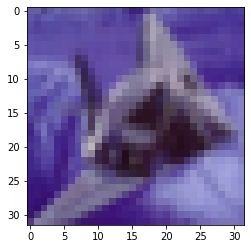

In [4]:
# Visualize data
plt.imshow(x_train[np.random.randint(len(x_train))])
plt.show()

In [5]:
# Convert class vectors to binary class matrices.
num_classes = 10
print("Y[0] before converting : " , y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("Y[0] after converting : " , y_train[0]) 

Y[0] before converting :  [6]
Y[0] after converting :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [34]:
# Fully connected model
fc_model = keras.Sequential()
fc_model.add(keras.layers.Input(shape=x_train[0].shape))
# Write your code here 
# Add Flatten layer and few Dense layers
fc_model.add(Flatten())

fc_model.add(Dense(units=20))
fc_model.add(Activation('relu'))

fc_model.add(Dense(units=10))
fc_model.add(Activation('relu'))

fc_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 3072)              0         
                                                                 
 dense_18 (Dense)            (None, 20)                61460     
                                                                 
 activation_18 (Activation)  (None, 20)                0         
                                                                 
 dense_19 (Dense)            (None, 10)                210       
                                                                 
 activation_19 (Activation)  (None, 10)                0         
                                                                 
Total params: 61,670
Trainable params: 61,670
Non-trainable params: 0
_________________________________________________________________


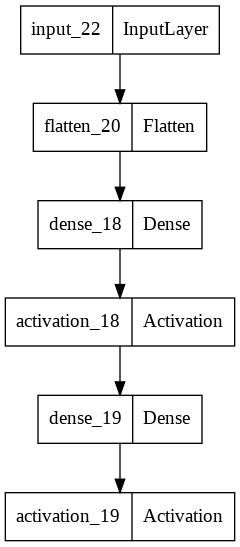

In [35]:
plot_model(fc_model)

In [38]:
Conv_model = keras.Sequential()
Conv_model.add(keras.layers.Input(shape=x_train[0].shape))
# write your code here
# add few Conv layers and Flatten layer
fc_model.add(Flatten())
Conv_model.add(
    Conv2D(
          filters=16,
          kernel_size=7,
          padding= 'valid',
          strides = 1 ,
          activation='relu',
      )
)

Conv_model.add(
    Conv2D(
          filters=16,
          kernel_size=7,
          padding= 'valid',
          strides = 1 ,
          activation='relu',
      )
)
Conv_model.add(
    MaxPooling2D(pool_size=(2,2), strides = None ,
                 padding = 'valid' )
)

Conv_model.add(
    Conv2D(
          filters=16,
          kernel_size=7,
          padding= 'valid',
          strides = 1 ,
          activation='relu',
      )
)

Conv_model.add(
    MaxPooling2D(pool_size=(2,2), strides = None ,
                 padding = 'valid' )
)

Conv_model.add(Flatten())

Conv_model.add(Dense(units=10))
Conv_model.add(Activation('relu'))

# you can use pool layers after Conv layers
Conv_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 26, 26, 16)        2368      
                                                                 
 conv2d_34 (Conv2D)          (None, 20, 20, 16)        12560     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 10, 10, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 4, 4, 16)          12560     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 2, 2, 16)         0         
 g2D)                                                            
                                                                 
 flatten_22 (Flatten)        (None, 64)              

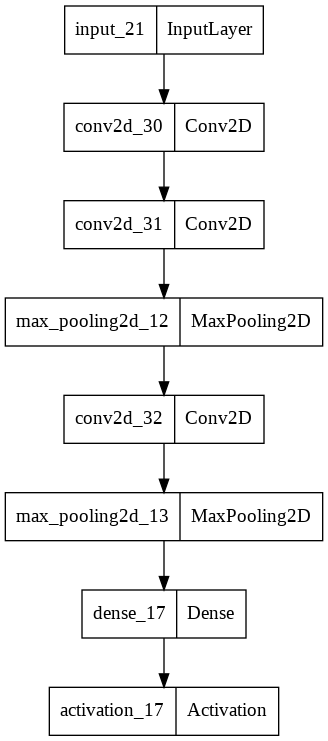

In [33]:
plot_model(Conv_model)

In [40]:
models_name = {}
models_name[0] = 'Fully Connected Model'
models_name[1] = 'Convolutional Model'

for i, model in enumerate([fc_model, Conv_model]):
    print(models_name[i])
    plot_model(model)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=2e-3),
        metrics=['accuracy'] 
    )   
    model.fit(x_train, y_train, epochs=5)
    print('\n')
    print('Loss and Accuracy on Test set : ')
    model.evaluate(x_test, y_test)
    print('\n')


Fully Connected Model
Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.9840 - accuracy: 0.1721
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.4581 - accuracy: 0.2134
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.4365 - accuracy: 0.1979
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.5333 - accuracy: 0.1818
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.4812 - accuracy: 0.1281


Loss and Accuracy on Test set : 
313/313 [==============================] - 1s 2ms/step - loss: 3.4277 - accuracy: 0.1645


Convolutional Model
Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 3.4686 - accuracy: 0.2066
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 3.4977 - accuracy: 0.1632
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 3.3640 - accuracy: 0.2255
Epoch 4/5
1563/1563 [===

#Q3

In [2]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt

In [3]:
!rm -r sample_data

In [4]:
!gdown "1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t
To: /content/fruits-360-original-size.zip
100% 579M/579M [00:06<00:00, 90.6MB/s]


In [ ]:
!unzip fruits-360-original-size.zip

## A : complete resize image

In [6]:
BASE_PATH = '/content/fruits-360-original-size/'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'Training')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'Test')

In [12]:
def resize_img(img, desired_size = 224):
    # write your code here
    border_v = 0
    border_h = 0
    if 1 >= (img.shape[0]/img.shape[1]):
        border_v = int(
            (img.shape[1]-img.shape[0])/2
            )
    else:
        border_h = int(
          (img.shape[0]-img.shape[1])/2
          )
    img = cv2.copyMakeBorder(img, border_v, border_v, border_h, border_h, cv2.BORDER_CONSTANT, 0)
    new_img = cv2.resize(img, (desired_size, desired_size))
    return new_img

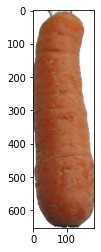

In [8]:
path = '/content/fruits-360-original-size/Training/carrot_1/r0_136.jpg'
img = cv2.imread(path)[:,:,::-1]
plt.imshow(img)
plt.show()

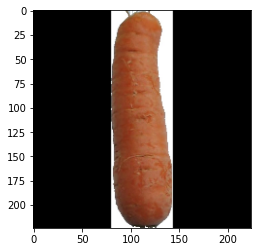

In [13]:
new_img = resize_img(img)
plt.imshow(new_img)

## Image Data generator

In [14]:
import tensorflow.keras.preprocessing.image as IM

train_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

test_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

train_generator  = train_datagen.flow_from_directory(DATA_TRAIN_PATH,batch_size=96,target_size=(224,224))
test_generator  = test_datagen.flow_from_directory(DATA_TEST_PATH,batch_size=96,target_size=(224,224))

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


## B : Resnet50 with random weigts

In [ ]:
# YOU CAN CHANGE IT
EPOCHS = 30

In [17]:
def add_block(model , x):

  model.add(Conv2D(filters=x,kernel_size=1,padding= 'valid',strides = 2 ,activation='relu'))
  model.add(Conv2D(filters=x,kernel_size=3,padding= 'valid',strides = 1 ,activation='relu'))
  model.add(Conv2D(filters=x*4,kernel_size=1,padding= 'valid',strides = 1 ,activation='relu'))

  for _ in range(2):
    model.add(Conv2D(filters=x,kernel_size=1,padding= 'valid',strides = 1 ,activation='relu'))
    model.add(Conv2D(filters=x,kernel_size=3,padding= 'valid',strides = 1 ,activation='relu'))
    model.add(Conv2D(filters=x*4,kernel_size=1,padding= 'valid',strides = 1 ,activation='relu'))

In [36]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [39]:
resnet = tf.keras.models.Sequential()
# Write your code here
resnet.add( ResNet50(weights='imagenet') )

resnet.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
Total params: 25,636,712
Trainable params: 25,583,592
Non-trainable params: 53,120
_________________________________________________________________


In [40]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [41]:
resnet.fit(train_generator, epochs=1)

InvalidArgumentError: ignored

## C : Fine-tune Resnet50 on fruits dataset.

In [ ]:
fine_tune_resnet = tf.keras.models.Sequential()
# write your code here 

fine_tune_resnet.summary()


In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
fine_tune_resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [ ]:
fine_tune_resnet.fit(train_generator, epochs=1)

## Test models

In [ ]:
resnet.evaluate(test_generator)

In [ ]:
fine_tune_resnet.evaluate(test_generator)